Task 1 Run a multilayer perceptron (feed forward neural network) with two hidden layers and rectifies linear nonlineartiries on the iris dataset using the Keras Sequential interface. include code for model selection and evalutation on an independent test-set.
[4pts for running model, 3pts for correct architecture, 3pts for evaluation]

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
X, y = iris.data, iris.target

In [4]:
print (X.shape, y.shape)

((150, 4), (150,))


In [5]:
def mytrain_test_split(X,y):
    r"""perform train test split
    Returns
    -------
    X_train : array
    y_train : array
    X_test : array
        dummified 
    y_test : array
        dummified
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
    y_train_dummy = keras.utils.to_categorical(y_train)
    y_test_dummy = keras.utils.to_categorical(y_test)
    return X_train, X_test, y_train_dummy, y_test_dummy

In [10]:
def train_nnet(X_train, X_test, y_train, y_test):
    r"""
    Returns
    -------
    hisotry_callback : <class 'keras.callbacks.History'>
        used for retrospective examiniation
    """
    
    num_class = 3
    input_shape = (4,)
    epochs = 12
    
    model = Sequential()
    model.add(Dense(16, input_shape=input_shape, activation="relu"))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(num_class, activation="softmax"))
    
    model.compile(loss="categorical_crossentropy", 
                  optimizer="adam", 
                  metrics=['accuracy'])
    history_callback = model.fit(X_train, 
              y_train, 
              verbose=0, 
              batch_size=1,
              validation_split=0.1,
              epochs=epochs
              )
    
    score = model.evaluate(X_test, y_test, verbose=0)
    
    print("Test loss: {}".format(score[0]))
    print("Test accuracy: {}".format(score[1]))
    #print(model.summary())

    return history_callback

In [11]:
def plot_history(logger):

    df = pd.DataFrame(logger)
    df[['acc', 'val_acc']].plot()
    plt.ylabel("accuracy")
    df[["loss", "val_loss"]].plot(linestyle="--", ax=plt.twinx())
    plt.ylabel("loss")

In [12]:
X_train, X_test, y_train, y_test = mytrain_test_split(X, y)

In [13]:
callback = train_nnet(X_train, X_test, y_train, y_test)

Test loss: 0.123024100536
Test accuracy: 1.0


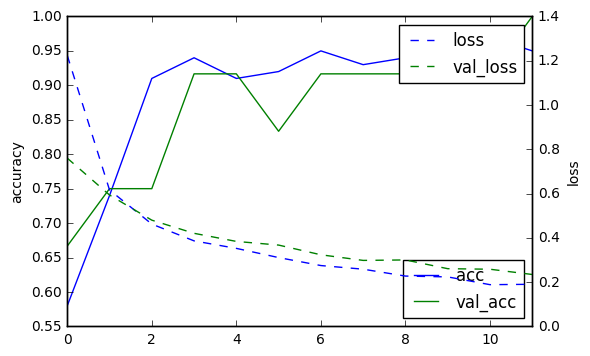

In [14]:
%matplotlib inline
plot_history(callback.history)

#### On this graph, the accuracy keeps increasing, so does validation score. 

#### Model Selection

In [ ]:
def make_nnet(hidden_size=16):
    r"""
    Returns
    -------
    model : model itself
    """
    
    num_class = 3
    input_shape = (4,)
    
    model = Sequential()
    model.add(Dense(hidden_size, input_shape=input_shape, activation="relu"))
    model.add(Dense(hidden_size/2, activation="relu"))
    model.add(Dense(num_class, activation="softmax"))
    
    model.compile(loss="categorical_crossentropy", 
                  optimizer="adam", 
                  metrics=['accuracy'])

    return  model

In [35]:
clf = KerasClassifier(make_nnet)
param_grid = {'epochs': [8, 20, 50, 100], 'hidden_size': [12], 'batch_size':[10]}
grid = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

Epoch 1/8
89/89 [==============================] - 1s - loss: 2.7737 - acc: 0.3258      
Epoch 2/8
89/89 [==============================] - 0s - loss: 2.0034 - acc: 0.3258     
Epoch 3/8
89/89 [==============================] - 0s - loss: 1.4016 - acc: 0.3258     
Epoch 4/8
89/89 [==============================] - 0s - loss: 1.0883 - acc: 0.3371     
Epoch 5/8
89/89 [==============================] - 0s - loss: 0.9192 - acc: 0.7079     
Epoch 6/8
89/89 [==============================] - 0s - loss: 0.8602 - acc: 0.8315     
Epoch 7/

GridSearchCV(cv=5, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f9edf960c10>,
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'epochs': [8, 20, 50, 100], 'hidden_size': [12], 'batch_size': [10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [37]:
res = pd.DataFrame(grid.cv_results_)
res.pivot_table(index=["param_epochs"],
                values=['mean_train_score', "mean_test_score"])

,mean_test_score,mean_train_score
param_epochs,,
8,0.383929,0.460549
20,0.776786,0.765868
50,0.901786,0.923945
100,0.973214,0.973208


#### Conclusion:
By fixing the number of units in the first layer to 12, and the second layer units as 6, and changing number of epochs, we see 100 epochs yields the highest accuracy, which is around 0.97